<a href="https://colab.research.google.com/github/arizzi/NNTutorial/blob/master/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import useful stuff

In [0]:
from keras.layers import Input,Dense,Dropout
from keras.models import Model
import numpy as np
from math import *
from matplotlib import pyplot as plt 

## Lets generate some data

In [0]:
nsamples=3000

def signalFeatures():
  x=np.random.rand()*3
  y=np.random.rand()*2
  z=cos(x*y)
  return x,y,z,1 #the last value here is the label, 1 = signal

def backgroundFeatures():
  x=np.random.normal(loc=1.5) #mean in 1.5
  y=1/(abs(x)+1)+np.random.rand()*0.7
  z=cos(x)
  return x,y,z,0 #the last value here is the label, 0 = signal



signal = np.asarray([signalFeatures() for x in range(nsamples)])
background = np.asarray([backgroundFeatures() for x in range(nsamples)])

print("Signal")
print("Shape is:", signal.shape)
print(signal)
print("Signal one entry")
print(signal[0,:])
print("Signal feature 2")
print(signal[:,2])
print("Background")
print(background)

  

Signal
Shape is: (3000, 4)
[[ 1.9847131   0.59469956  0.38064002  1.        ]
 [ 2.53972808  1.86722384  0.02984741  1.        ]
 [ 2.15278753  1.71862222 -0.84819089  1.        ]
 ...
 [ 2.07227324  1.31027081 -0.91047981  1.        ]
 [ 0.33257429  0.24665556  0.99663732  1.        ]
 [ 0.26339226  0.89501235  0.97234193  1.        ]]
Signal one entry
[1.9847131  0.59469956 0.38064002 1.        ]
Signal feature 2
[ 0.38064002  0.02984741 -0.84819089 ... -0.91047981  0.99663732
  0.97234193]
Background
[[ 3.33263187  0.3551567  -0.98180744  0.        ]
 [ 2.30975396  0.72435369 -0.67351779  0.        ]
 [ 0.59397876  1.30193026  0.82872048  0.        ]
 ...
 [ 1.0786115   0.57650382  0.47255251  0.        ]
 [ 1.88838613  0.81894842 -0.31227781  0.        ]
 [ 2.20537749  0.79563242 -0.59284027  0.        ]]


Let's look at our generated features for signal and background

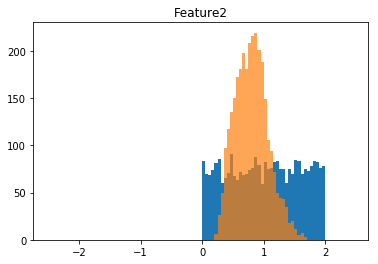

In [0]:
plt.hist(signal[:,1], bins = [ (x/20.-2.5) for x in range(100)]) 
plt.title("Feature2") 
plt.hist(background[:,1], bins = [ (x/20.-2.5) for x in range(100)],alpha=.7) #make it a bit transparent 
plt.show()

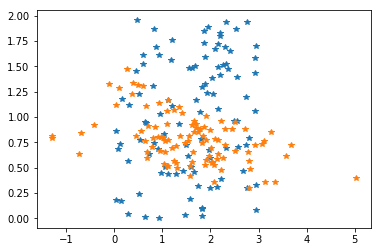

In [0]:
plt.plot(signal[0:100,0],signal[0:100,1],'*')
plt.plot(background[0:100,0],background[0:100,1],'*')


In [0]:
data=np.concatenate((background,signal))
np.random.shuffle(data)
print(data)


[[ 0.55680821  0.89606879  0.84894623  0.        ]
 [ 1.32672393  0.59897894  0.24165631  0.        ]
 [ 0.88206423  1.17920496  0.6355588   0.        ]
 ...
 [ 0.84870544  0.33578793  0.95966586  1.        ]
 [ 1.81551756  0.61701495 -0.24228588  0.        ]
 [ 1.96474401  0.02223957  0.99904552  1.        ]]


Now we build a Feed Forward NN


In [0]:
inputs=Input(shape=(3,))
h1=  Dense(10, activation='relu')(inputs)
h1d= Dropout(0.1)(h1)
h2=  Dense(10, activation='relu')(h1)
h3=  Dense(5, activation='relu')(h2)
outputs = Dense(1, activation='sigmoid')(h3)
#h1=  Dense(10, activation='relu')(inputs)
#outputs = Dense(1, activation='sigmoid')(h1)
model = Model(input=inputs, output=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()


history=model.fit(data[:,0:3],data[:,3:],validation_split=0.5,nb_epoch=500)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 3000 samples, validate on 3000 samples
Epoch 1/500
3000/3000 [==============================] - 1s 177us/step - loss: 0.6891 - acc: 0.5383 - val_loss: 0.6609 - val_acc: 0.5777
Epoch 2/500
3000/3000 [==============================] - 0s 52us/step - loss: 0.6502 - acc: 0.6237 - val_loss: 0.6352 - val_acc: 0.6487
Epoch 3/500
3000/3000 [==============================] - 0s 52us/step - loss: 0.6194 - acc: 0.6650 - val_loss: 0.5944 - val_acc: 0.6717
Epoch 4/500
3000/3000 [==============================] - 0s 54us/step - loss: 0.5760 - acc: 0.6927 - val_loss: 0.5430 - val_acc: 0.7017
Epoch 5/500
3000/3000 [==============================] - 0s 53us/step - loss: 0.5139 - acc: 0.7433 - val_loss: 0.4714 - val_acc: 0.8063
Epoch 6/500
3000/3000 [==============================] - 0s 53us/step - loss: 0.4499 - acc: 0.8120 - val_loss: 0.4327 - val_acc: 0.7923
Epoch 7/500
3000/3000 [==============================] - 0s 53us/step - loss: 0.3985 - acc: 0.8407 - val_loss: 0.3646 - val_acc: 0.8710

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


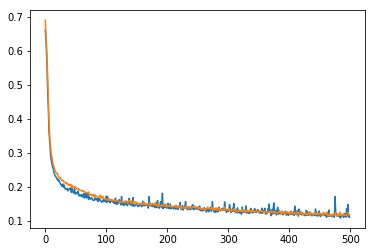

In [0]:
print(history.history.keys())
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.show()

In [0]:
preds=model.predict(data[:,0:3])
print(np.hstack( (preds,data[:,3:]) ))

[[6.76131845e-02 0.00000000e+00]
 [1.27851963e-05 0.00000000e+00]
 [1.87309504e-01 0.00000000e+00]
 ...
 [9.99996543e-01 1.00000000e+00]
 [3.27825546e-07 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00]]


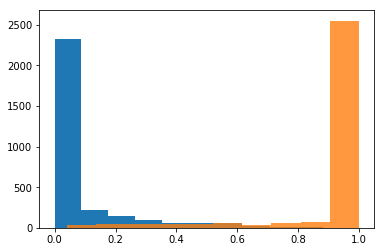

In [0]:
plt.hist(preds[(data[:,3:]==0)])
plt.hist(preds[(data[:,3:]==1)],alpha=0.8)
plt.show()